In [21]:
using Random
using Distributions
using LinearAlgebra
using ForwardDiff
include("LowRankCov.jl")
include("LowRankBBVI.jl")
include("../Inversion/Plot.jl")
include("../Derivative-Free-Variational-Inference/MultiModal.jl")
Random.seed!(111);

dt = 0.0030815022827344234
dt = 0.002558861390567138


[ Info: ("iter = ", 50, " / ", 500)


dt = 0.005723667086815168
dt = 0.006083153135028264
dt = 0.004217588422158004


[ Info: ("iter = ", 100, " / ", 500)


dt = 0.0032457867802682017
dt = 0.0033549155868642356


[ Info: ("iter = ", 150, " / ", 500)


dt = 0.005095744899000548
dt = 0.006102815730255943
dt = 0.00631677131771639


[ Info: ("iter = ", 200, " / ", 500)


dt = 0.005725580835503756
dt = 0.006890309567935654


[ Info: ("iter = ", 250, " / ", 500)


dt = 0.006799109280974579
dt = 0.003870726986112325
dt = 0.003938534735140663


[ Info: ("iter = ", 300, " / ", 500)


dt = 0.004951305276657989
dt = 0.005424250760049785


[ Info: ("iter = ", 350, " / ", 500)


dt = 0.010343427599390439
dt = 0.003257303739797141
dt = 0.0059342830214378795


[ Info: ("iter = ", 400, " / ", 500)


dt = 0.00533667315934991
dt = 0.005052996939451221


[ Info: ("iter = ", 450, " / ", 500)


dt = 0.0053343078615231895
dt = 0.0036901241411217488
dt = 0.0034290902679894745


[ Info: ("iter = ", 500, " / ", 500)


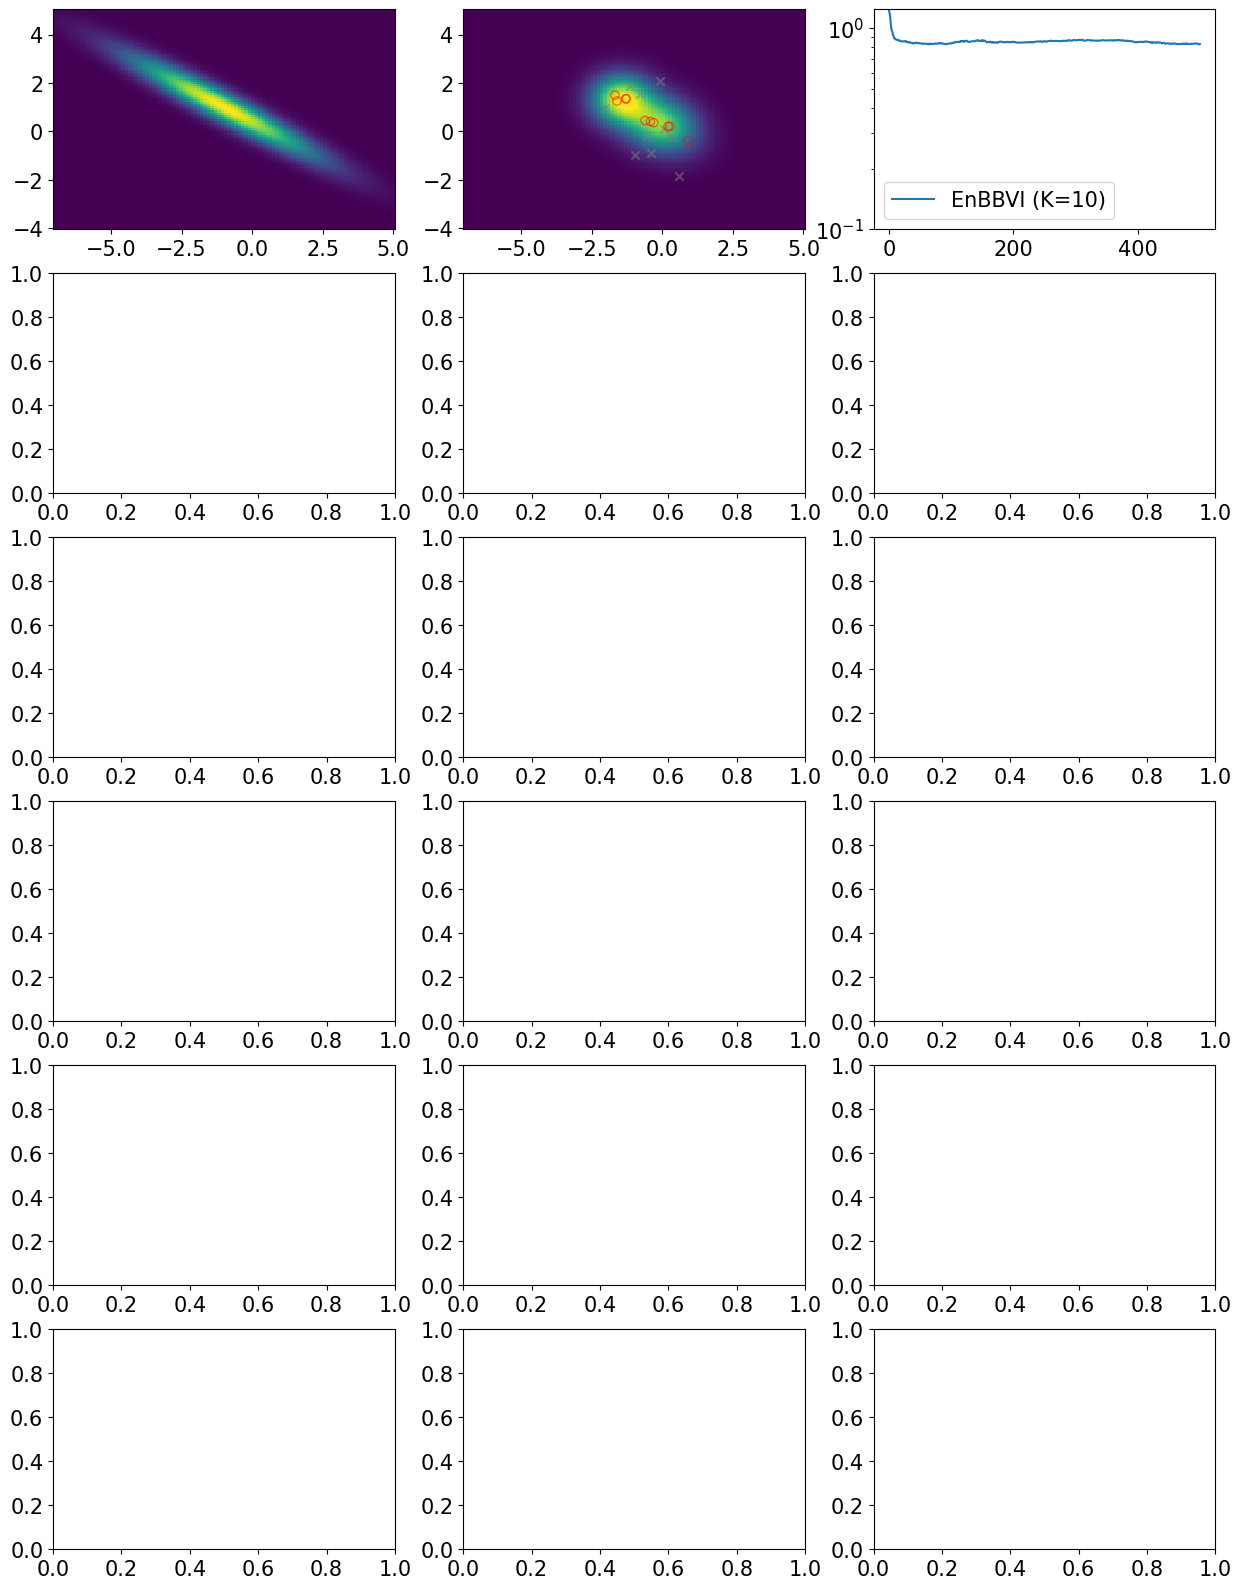

PyObject <matplotlib.legend.Legend object at 0x000001D241768490>

In [ ]:
N_modes_array = [10]
fig, ax = PyPlot.subplots(nrows=6, ncols=length(N_modes_array)+2, sharex=false, sharey=false, figsize=((length(N_modes_array)+2)*5,20))


N_modes = N_modes_array[end]
N_x = 20
N_r = 10
x0_w  = ones(N_modes)/N_modes
cov_eps0 = 0.5*ones(N_modes)
μ0, Σ0 = zeros(N_x), Diagonal(ones(N_x))
x0_mean, xx0_sqrt_cov = zeros(N_modes, N_x), zeros(N_modes, N_x, N_r)
for im = 1:N_modes
    x0_mean[im, :] .= rand(MvNormal(zeros(N_x), Σ0)) + μ0
    xx0_sqrt_cov[im, :, :] = 0.5*rand(N_x,N_r)/sqrt(N_r)
end

N_iter = 500
Nx, Ny = 100,100

# ση = 1.0
# Gtype = "Gaussian"
# dt = 0.2
# A = [1.0 1.0; 1.0 2.0]
# y = [0.0; 1.0; zeros(N_x-2)]
# func_args = (y, ση, A , Gtype)
# func_F(x) = F(x, func_args)
# func_Phi(x) = 0.5*norm(func_F(x))^2
# objs = [Gaussian_mixture_EnBBVI(func_Phi, x0_w[1:N_modes], x0_mean[1:N_modes,:], xx0_sqrt_cov[1:N_modes,:,:], cov_eps0[1:N_modes]; N_iter = N_iter, dt = dt)
#         for N_modes in N_modes_array]
# y_2d = y[1:2]
# func_args = (y_2d, ση, A , Gtype)
# func_F(x) = F(x, func_args)
# PGM_visualization_2d(ax[1,:]; Nx = Nx, Ny = Ny, x_lim=[-7.0, 5.0], y_lim=[-4.0, 5.0], func_Phi=func_Phi, objs=objs, label="EnBBVI")



ση = 1.0
dt = 0.5
Gtype = "Four_modes"
y = [4.2297; 4.2297; 0.5; 0.0; zeros(N_x-2)]
func_args = (y, ση, 0, Gtype)
func_F(x) = F(x, func_args)
func_Phi(x) = norm(func_F(x),2)^2/2
objs = [Gaussian_mixture_EnBBVI(func_Phi, x0_w[1:N_modes], x0_mean[1:N_modes,:], xx0_sqrt_cov[1:N_modes,:,:], cov_eps0[1:N_modes]; N_iter = N_iter, dt = dt)
        for N_modes in N_modes_array]
y_2d = y[1:4]
func_args = (y_2d, ση, A , Gtype)
func_F(x) = F(x, func_args) 
PGM_visualization_2d(ax[2,:]; Nx = Nx, Ny = Ny, x_lim=[-4.0, 4.0], y_lim=[-4.0, 4.0], func_Phi=func_Phi, objs=objs)


# ση = [sqrt(10.0);sqrt(10.0); ones(N_x-2)]
# Gtype = "Banana"
# dt = 0.5
# λ = 10.0
# y = [0.0; 1.0; zeros(N_x-2)]
# func_args = (y, ση, λ , Gtype)
# func_F(x) = F(x, func_args)
# func_Phi(x) = norm(func_F(x),2)^2/2
# μ0, Σ0 = [0.0; 0.0], [1.0 0.0; 0.0 1.0]
# objs1 = [Gaussian_mixture_EnBBVI(func_Phi, x0_w[1:N_modes], x0_mean[1:N_modes,:], xx0_sqrt_cov[1:N_modes,:,:], cov_eps0[1:N_modes]; N_iter = N_iter, dt = dt)
#         for N_modes in N_modes_array]
# y_2d, ση_2d = y[1:2], ση[1:2]
# func_args = (y_2d, ση_2d, λ , Gtype)
# func_F(x) = F(x, func_args)
# PGM_visualization_2d(ax[5,:]; Nx = Nx, Ny = Ny, x_lim=[-4.0, 4.0], y_lim=[-2.0, 10.0], func_Phi=func_Phi, objs=objs1)




# fig.tight_layout()
# fig.savefig("BBVI-GMD-Multimodal.pdf")
